## Optimum Directivity Calculator
### M.T. Ma, 'Theory and Application of Antenna Arrays', Wiley-Interscience 1974

In [1]:
import sympy as sp
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
cfloat = 299792498.0
%matplotlib inline
from scipy.constants import speed_of_light
from IPython.display import display
from pprint import pprint
plt.rcParams.update({'figure.figsize':[15.0,9.0],'font.size':16})


In [2]:
freqMHz = 7.0
theta0 = 90.0 #optimal direction
wavelength = speed_of_light/(freqMHz*1.0e6)
k = 2*np.pi/wavelength
print 'Calculation frequency: {0:.3f}MHz, wavelength: {1:.3f} meters, k: {2:.4f} radians/m'.format(freqMHz,wavelength,k)


z = np.array([5.0,10.0,15.0,25.0,35.0,45.0,55.0])

print 'Element z coordinates (m): {0}'.format(z)

Calculation frequency: 7.000MHz, wavelength: 42.827 meters, k: 0.1467 radians/m
Element z coordinates (m): [  5.  10.  15.  25.  35.  45.  55.]


## Sec 2.9, p156: Quadratic Form Approach - Maximization of Directivity

A linear array of arbitrarily-spaced elements is located along the $z$ or $\zeta$ axis. The angle $\theta$ describes the heading, with $\theta=0$ in the line of the elements:

<img src="https://goo.gl/4wFTwZ" alt="Figure 1.2, Book" style="width: 600px;"/>

The coordinate system is defined in this way, so the elements are defined along the VERTICAL axis, with $\theta$ as the heading with respect to straight up. This is unusual w.r.t EZNEC coordinates, so care needs to be taken in outputting EZNEC wire list.

<img src ="https://goo.gl/81G7zF", alt="Figure 1.1, Book" style="width: 600px;"/>

Ma gives the general field pattern of this array (p with element currents $I_i$, phases $\alpha_i$, positions $z_i$ and wavenumber $k=2\pi/\lambda$ as:
### $$ E=f(\theta,\phi)\sum_{i=1}^{n} I_i e^{j\alpha_i+jkz_i\cos(\theta)} \hspace{3cm}(2.231)$$     

and the directivity $D$ as the ratio of the field magnitude at the peak of the main beam to the integral over all solid angles:

### $$D=\frac{4\pi  \lvert E(\theta_0,\phi_0)\rvert^2}{\int_0^{2\pi}\int_0^{\pi}\lvert E\rvert^2 \sin\theta d\theta d\phi}\hspace{3cm}(2.232)$$



$D$ is expressed in a quadratic matrix form by defining 

### \begin{equation*}
[I]=  \begin{bmatrix}
I_1 e^{j\alpha_1} \\
I_2 e^{j\alpha 2} \\
\vdots \\
I_n e^{j\alpha_n} \\
\end{bmatrix}
\hspace{3cm}
(2.233)
\end{equation*}

and 

### \begin{equation*}
[e] = \begin{bmatrix}
exp(-jkz_1\cos(\theta_0)\\
exp(-jkz_2\cos(\theta_0)\\
\vdots \\
exp(-jkz_n\cos(\theta_0)\\
\end{bmatrix}
\hspace{3cm}
(2.234)
\end{equation*}

So that (with $\dagger$ denoting complex conjugate),

### $$D = \frac{[I]^\dagger [A][I]}{[I]^\dagger[B][I]}\hspace{3cm}(2.235)$$

where 

### $$[A]=[e][e]^\dagger\hspace{3cm}(2.236)$$

$[A]$ is a square $n\times n$ matrix with matrix elements $a_{lm}$:

### $$a_{lm} = \exp[jk(z_m-z_l)\cos{\theta_0}\hspace{3cm}(2.237)$$

$[B]$ is a square $n\times n$ matrix with matrix elements $b_{lm}$ given by:

### $$b_{lm} = \frac{1}{4\pi} \int_0^{2\pi}\int_0^\pi f(\theta,\phi)^2 \exp{[jk(z_m-z_l)\cos\theta]} \sin{\theta}d\theta d\phi\hspace{3cm}(2.238)$$

The optimal directivity is given by 
### $$D_{max} = [e]^\dagger [B]^{-1} [e] \hspace{3cm}(2.244)$$

and occurs with currents given simply by

### $$[I]_{opt} = [B]^{-1}[e]\hspace{3cm}(2.245)$$

Ma writes: "Equations (2.244) and (2.245) constitute the complete solution to the directivity optimization problem. Note that this does not require the solution of simultaneous equations. Once the element positions $z_i$ are given, $b_{lm}$ can be calculated from (2.238), which is independent of $\alpha_i$ and $\theta_0$. The matrix $[e]$ can be easily obtained if $\theta_0$ is also known. Then, finding the inverse of $[B]$ is the only rather complicated operation to get the final answer. Substituting (2.245) into (2.244) and nothing the fact that $[B]$ is symmetric in application, we have

### $$p_n = D_{max} = [I]_{opt}^\dagger[B][I]_{opt}\hspace{3cm}(2.246)$$
which is the demominator of (2.235)."

In [3]:
e = np.zeros(len(z),dtype=np.complex_)

In [4]:

for n,zc in enumerate(z):
    e[n] = np.exp(-1j*zc*k*np.cos(theta0*np.pi/180.0))
print 'Matrix [e] is {0}, of type {1}'.format(e,type(e))

Matrix [e] is [ 1. -4.49167232e-17j  1. -8.98334464e-17j  1. -1.34750170e-16j
  1. -2.24583616e-16j  1. -3.14417062e-16j  1. -4.04250509e-16j
  1. -4.94083955e-16j], of type <type 'numpy.ndarray'>


For practical applications for high impedance recieving arrays, we should not use isotropic elements but instead should use the fields of short dipole elements.

Ma analyzes an array of short, parallel dipoles on pp 15-16:

<img src="https://goo.gl/iacrKF", style="width:600px;"/>

giving the individual element pattern

### $$f(\theta,\phi) = (1-\sin^2\theta\cos^2\phi)^{1/2}$$

(I think the $\cos^2\phi$ could be $\sin^2\phi$ depending on the dipoles' polarization... $\phi=0$ is along the $\xi$ axis)

So now I'll define the matrix elements $b_{lm}$ by numerically integrating:

### $$b_{lm} = \frac{1}{4\pi} \int_0^{2\pi}\int_0^\pi f(\theta,\phi)^2 \exp{[jk(z_m-z_l)\cos\theta]} \sin{\theta}d\theta d\phi\hspace{3cm}(2.238)$$

In [5]:
def f_isotropic(th,phi):
    return 1.0
def f_dipole(th,phi):
    return np.power((1-np.power(np.sin(th),2)*np.power(np.cos(th),2)),0.5)
def blmnum_integrand(th,phi,zl,zm):
    return 1/(4*np.pi)*np.power(f_dipole(th,phi),2)*np.exp(1j*k*(zm-zl)*np.cos(th))*np.sin(th)
def blmnum(zl,zm):
    rlprt = scipy.integrate.nquad(lambda th,ph: np.real(blmnum_integrand(th,ph,zl,zm)),[(0,np.pi),(0,2*np.pi)])
    imprt = scipy.integrate.nquad(lambda th,ph: np.imag(blmnum_integrand(th,ph,zl,zm)),[(0,np.pi),(0,2*np.pi)])
    return rlprt[0]+1j*imprt[0]

In [6]:
B = np.zeros([len(z),len(z)],dtype=np.complex_)
for l,zl in enumerate(z):
    for m,zm in enumerate(z):
        B[l,m] = blmnum(zl,zm)


In [7]:
sp.init_printing()

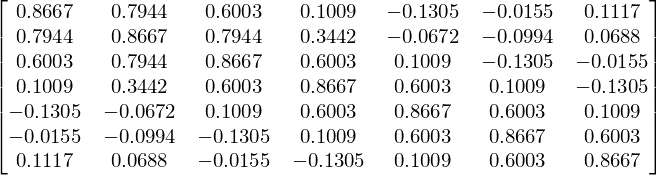

In [8]:
display(sp.Matrix(B.round(4)))

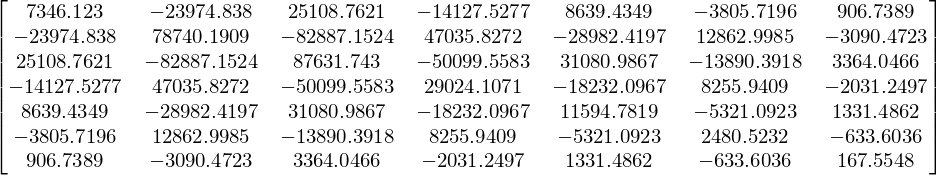

In [9]:
Binv = np.linalg.inv(B)
display(sp.Matrix(Binv.round(4)))

I_opt = 


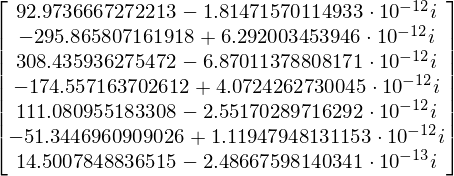

In [10]:
Iopt = np.matmul(Binv,e)
print('I_opt = ')
display(sp.Matrix(Iopt))

In [11]:
for i,current in enumerate(Iopt): 
    print 'I{0}: {1:.3f}A'.format(i+1, abs(current)), 'phase: {0:.2f} '.format(np.angle(current)*180.0/np.pi)

I1: 92.974A phase: -0.00 
I2: 295.866A phase: 180.00 
I3: 308.436A phase: -0.00 
I4: 174.557A phase: 180.00 
I5: 111.081A phase: -0.00 
I6: 51.345A phase: 180.00 
I7: 14.501A phase: -0.00 


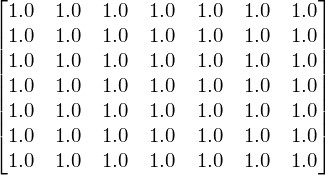

In [12]:
A = np.outer(e,e.conj())
display(sp.Matrix(A.round(4)))

Calculate the maximum directivity per (2.246)

In [13]:
firstmul = np.matmul(Iopt.conj(),B)
Dmax = np.real(np.matmul(firstmul,Iopt))
print Dmax

5.22367611423


In [14]:
print 'Optimal directivity is {0:.3f}, or {1:.3f}dB'.format(float(Dmax),10*np.log10(Dmax))

Optimal directivity is 5.224, or 7.180dB


Let's plot the array pattern:

### $$ \lvert E(\theta,\phi) \rvert ^2 =\left\lvert f(\theta,\phi)\sum_{i=1}^{n} I_i e^{j\alpha_i}\exp{ [jkz_i\cos(\theta)]}\right \rvert^2$$   

where $I_i\exp{j\alpha_i}$ is the ith element of $I_{opt}$

In [15]:
def plot_dB(thdata,rdata):
    '''Makes a dB plot in matplotlib'''
    mindata = np.min(rdata)
    maxdata = np.max(rdata)
    normdata = rdata/maxdata 
    dBraw = 10.0*np.log10(normdata)
    dBpos = dBraw - min(dBraw) #make the minimum equal to zero
    dBmax = max(dBpos)
    
    rticks = [dBmax-40.0, dBmax-30.0,dBmax-20.0,dBmax-10.0,dBmax]
    rlabelnums = rticks-dBmax #biggest label is zero
    rlabel = ['{0:.2f}'.format(num) for num in rlabelnums]
    
    
    fig1 = plt.figure()
    fig1.patch.set_alpha(0.0)
    ax1f1 = fig1.add_subplot(111,projection='polar')
    ax1f1.plot(thdata,dBpos,color='k',linewidth=3)
    ax1f1.plot(2*np.pi-thdata,dBpos,color='k',linewidth=3)
    ax1f1.set_rlim(max(dBpos)-40.0,max(dBpos)+1.0)
    ax1f1.set_yticks(rticks)
    ax1f1.set_yticklabels(rlabel)
    return fig1,ax1f1

def plot_linear(thdata,rdata):
    '''Makes a linear-scale plot with dB markings in matplotlib'''
   
    rdata = rdata/np.max(rdata)
    dbticks = np.array([-20.0,-15.0,-10.0,-5.0,0.0])
    lindBticks = np.power(10.0,dbticks/10.0)
    print lindBticks
    
    rlabel = ['{0:.2f}'.format(num) for num in dbticks]
    
    
    fig1 = plt.figure()
    fig1.patch.set_alpha(0.0)
    ax1f1 = fig1.add_subplot(111,projection='polar')
    ax1f1.plot(thdata,rdata,color='k',linewidth=3)
    ax1f1.plot(2*np.pi-thdata,rdata,color='k',linewidth=3)
    ax1f1.set_rlim(0.01,1.01)
    ax1f1.set_yticks(lindBticks)
    ax1f1.set_yticklabels(rlabel)
    return fig1,ax1f1

In [16]:
sum = 0
thplot = np.linspace(0,np.pi,200)
phiplot = 0.0 # all the thetas with phi=0, will use symmetry to see the other side of the pattern
for Ii_cplx,zi in zip(Iopt,z):
    sum = sum+Ii_cplx*np.exp(1j*k*zi*np.cos(thplot))
E = f_dipole(thplot,phiplot)*sum
Esq = np.real(E*E.conj())

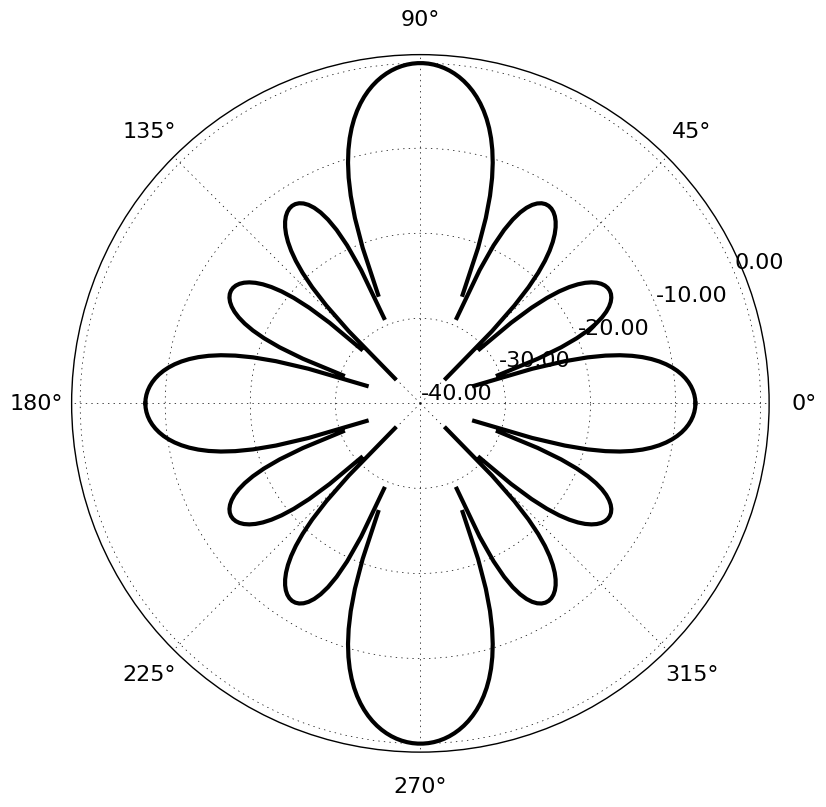

In [17]:
fig,ax = plot_dB(thplot,Esq)


In [18]:
#this will write the z-coordinates along the X AXIS in Eznec, and the elements will be oriented as verticals
element_length = 4.0
element_height_above_ground = 10.0
zval_e1 = element_height_above_ground-element_length/2.0
zval_e2 = element_height_above_ground+element_length/2.0
x = z.tolist()
yval = 0.0
wirediam_mm = 10.0

with open('EZ_wires_optimum_directivity.txt','w') as f:
    f.write('m mm\r\n')
    for xval in x:
        tempwire = [xval,yval,zval_e1,xval,yval,zval_e2,wirediam_mm]
        f.write(', '.join(map(str,tempwire))+'\r\n')

In [19]:
tempwire

In [20]:
', '.join(map(str,tempwire))

'55.0, 0.0, 8.0, 55.0, 0.0, 12.0, 10.0'

In [21]:
Ioptnorm = Iopt/np.max(np.max(np.abs(Iopt)))
for i,current in enumerate(Ioptnorm): 
    print 'I{0}: {1:.5f}A'.format(i+1, np.abs(current)), 'phase: {0:.4f} '.format(np.angle(current)*180.0/np.pi)

I1: 0.30144A phase: -0.0000 
I2: 0.95925A phase: 180.0000 
I3: 1.00000A phase: -0.0000 
I4: 0.56594A phase: 180.0000 
I5: 0.36014A phase: -0.0000 
I6: 0.16647A phase: 180.0000 
I7: 0.04701A phase: -0.0000 


In [22]:
ezmax = -21.87
avg_gain = -31.65

D = ezmax-avg_gain
print 'EZNEC directivity is {0:.2f}dB, python {1:.2f}dB'.format(D,10.0*np.log10(Dmax))

EZNEC directivity is 9.78dB, python 7.18dB


**NOTE:** some off-axis discrepancies could be due to issues with the form of short dipoles, see page 209 eq (3.64)